In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
location = pd.read_csv('Locations.csv')
tank = pd.read_csv('Tanks.csv')
invoice = pd.read_csv('Invoices.csv')
fuel_1 = pd.read_csv('Fuel_Level_Part_1.csv')
fuel_2 = pd.read_csv('Fuel_Level_Part_2.csv')

#set the default polot size for matplotlib
plt.rcParams['figure.figsize']= (12,8)
print(fuel_1.head())
fuel_2.head()

  Tank ID  Fuel Level     Time stamp
0    T 12     27161.0  1/1/2017 0:10
1    T 12     27017.0  1/1/2017 0:25
2    T 12     26934.0  1/1/2017 0:40
3     T12         NaN  1/1/2017 0:45
4    T 12     26786.0  1/1/2017 0:55


,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10


In [5]:
print(location.head())

   Gas Station Location Gas Station Name  \
0                     1        EastMount   
1                     2         Eastgate   
2                     3          Central   
3                     4          Chedoke   
4                     5    Mountain View   

                                 Gas Station Address  Gas Station Latitude  \
0   386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada             43.234670   
1  75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...             43.230700   
2         80 Park St N, Hamilton, ON L8R 2M9, Canada             43.260260   
3        16 McMaster Ave, Dundas, ON L9H 0A8, Canada             43.261849   
4        985 Scenic Dr, Hamilton, ON L9C 1H7, Canada             43.244910   

   Gas Station Longitude  
0             -79.836510  
1             -79.763930  
2             -79.870580  
3             -79.937057  
4             -79.921850  


In [6]:
print(tank)

   Tank ID  Tank Location  Tank Number Tank Type  Tank Capacity
0     T 10              1            1         U          40000
1     T 11              1            2         U          40000
2     T 12              1            3         D          40000
3     T 13              1            4         P          40000
4     T 14              1            5         U          40000
5     T 15              1            6         D          40000
6     T 16              2            1         U          70000
7     T 17              2            2         D          40000
8     T 18              2            3         U          40000
9     T 19              2            4         D          70000
10    T 20              3            1         U          30000
11    T 21              3            2         D          30000
12    T 22              4            1         U          40000
13    T 23              4            2         D          40000
14    T 24              5            1  

In [7]:
print(invoice.head())

  Invoice Date  Invoice ID  Invoice Gas Station Location  Gross Purchase Cost  \
0     1/2/2017     10000.0                             1             7570.820   
1     1/2/2017     10001.0                             1            12491.853   
2     1/2/2017     10002.0                             1                  NaN   
3     1/2/2017     10002.0                             2            17034.345   
4     1/2/2017         NaN                             2                  NaN   

   Amount Purchased Fuel Type  
0          6609.600         G  
1          9338.736         D  
2               NaN       NaN  
3         13377.824         D  
4               NaN       NaN  


# Exploritory Data Analysis

In [8]:
location['Gas Station Location'].nunique()

8

In [4]:
tank['Tank Location'].nunique()

8

In [5]:
print(tank.head())
print(location.head())
print(fuel_1.head())
tank_loc= pd.merge(tank, location, left_on='Tank Location', right_on='Gas Station Location')
tank_loc
tank_loc.drop('Tank Location', axis=1)

  Tank ID  Tank Location  Tank Number Tank Type  Tank Capacity
0    T 10              1            1         U          40000
1    T 11              1            2         U          40000
2    T 12              1            3         D          40000
3    T 13              1            4         P          40000
4    T 14              1            5         U          40000
   Gas Station Location Gas Station Name  \
0                     1        EastMount   
1                     2         Eastgate   
2                     3          Central   
3                     4          Chedoke   
4                     5    Mountain View   

                                 Gas Station Address  Gas Station Latitude  \
0   386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada             43.234670   
1  75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...             43.230700   
2         80 Park St N, Hamilton, ON L8R 2M9, Canada             43.260260   
3        16 McMaster Ave, Dundas, ON L9H 0A8,

,Tank ID,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,T 10,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
1,T 11,2,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
2,T 12,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
3,T 13,4,P,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
4,T 14,5,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
5,T 15,6,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
6,T 16,1,U,70000,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
7,T 17,2,D,40000,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
8,T 18,3,U,40000,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
9,T 19,4,D,70000,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930


In [6]:
#due to other dataframes only having gas station location IDs from 1-8 and the fact that their is only one invoice for station locations 20,21,17,41, and 11, I an going to assume that these recordings are mistakes and will drop them.
print(invoice['Invoice Gas Station Location'].value_counts())
values = [20,21,17,41,11]

# this will drop rows containing 'values' in the 'Invoice Gas Station Location' column that i believe to be errors
invoice = invoice[-invoice['Invoice Gas Station Location'].isin([20,21,17,41,11])]
print(invoice['Invoice Gas Station Location'].value_counts())


1     1368
2      638
4      363
5      287
3       85
7       52
6       44
8       31
20       1
17       1
21       1
41       1
11       1
Name: Invoice Gas Station Location, dtype: int64
1    1368
2     638
4     363
5     287
3      85
7      52
6      44
8      31
Name: Invoice Gas Station Location, dtype: int64


In [7]:
invoice['Invoice Date'] = pd.to_datetime(invoice['Invoice Date'])
invoice['dollar/gallon']=invoice['Gross Purchase Cost']/invoice['Amount Purchased']
print(invoice.info())
invoice_d = invoice[invoice['Fuel Type']=='D']
invoice_g = invoice[invoice['Fuel Type']=='G']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 0 to 2872
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Invoice Date                  2868 non-null   datetime64[ns]
 1   Invoice ID                    2832 non-null   float64       
 2   Invoice Gas Station Location  2868 non-null   int64         
 3   Gross Purchase Cost           2831 non-null   float64       
 4   Amount Purchased              2831 non-null   float64       
 5   Fuel Type                     2831 non-null   object        
 6   dollar/gallon                 2831 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 179.2+ KB
None


# investigate the records where dollars/gallon is higher than normal

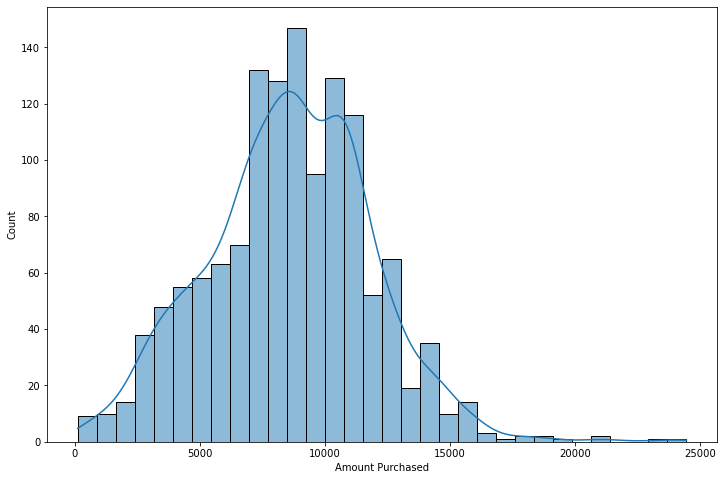

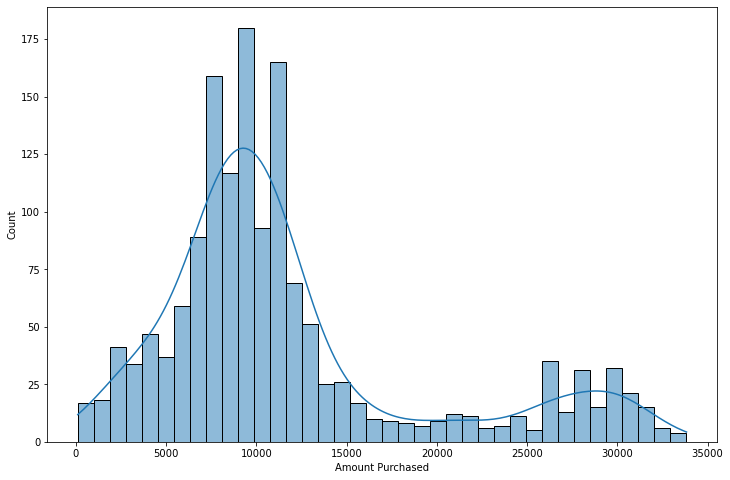

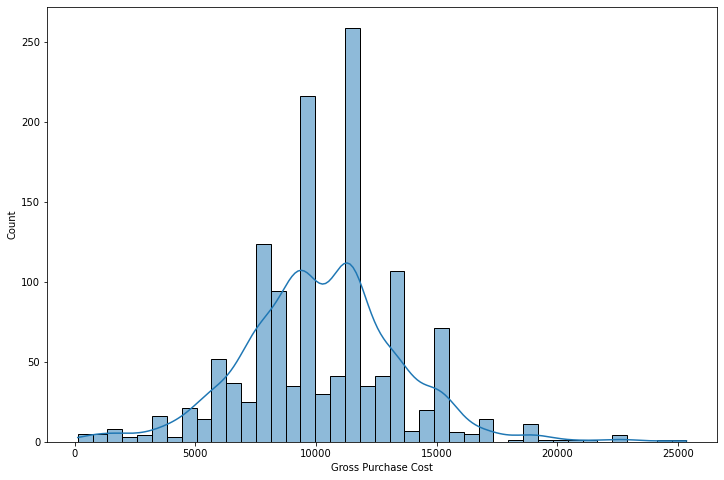

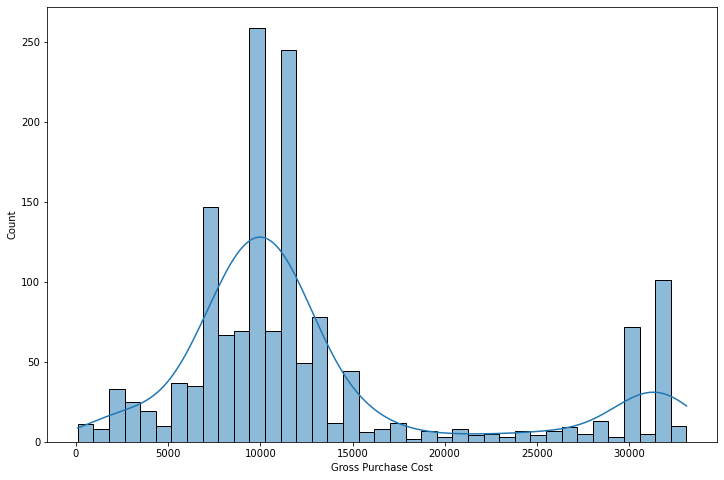

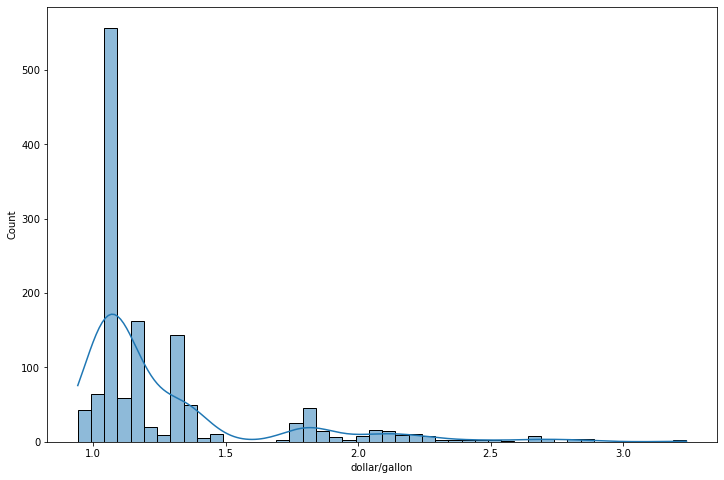

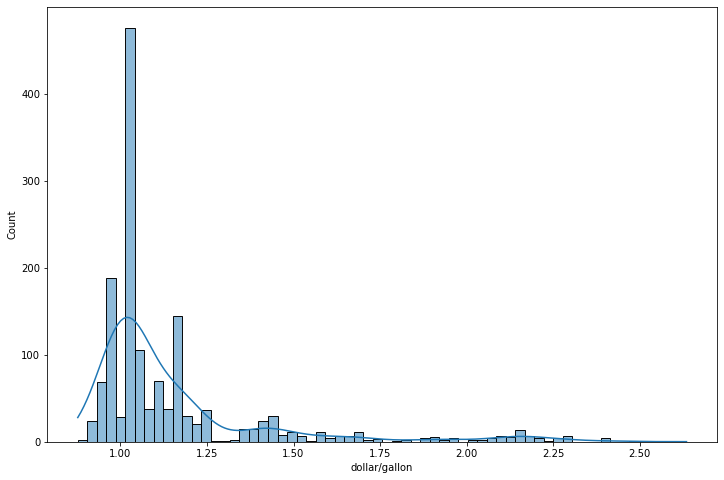

   Invoice Gas Station Location  Invoice Date  Invoice ID  \
0                             1           104         104   
1                             2            30          30   
2                             3             1           1   
3                             4            32          32   
4                             5            24          24   
5                             6             2           2   
6                             7             2           2   
7                             8             2           2   

   Gross Purchase Cost  Amount Purchased  Fuel Type  dollar/gallon  
0                  104               104        104            104  
1                   30                30         30             30  
2                    1                 1          1              1  
3                   32                32         32             32  
4                   24                24         24             24  
5                    2              

In [8]:
sns.histplot(data=invoice_d, x='Amount Purchased', kde=True)
plt.show()
sns.histplot(data=invoice_g, x='Amount Purchased', kde=True)
plt.show()

sns.histplot(data=invoice_d, x='Gross Purchase Cost', kde=True)
plt.show()
sns.histplot(data=invoice_g, x='Gross Purchase Cost', kde=True)
plt.show()

sns.histplot(data=invoice_d, x='dollar/gallon', kde=True)
plt.show()
sns.histplot(data=invoice_g, x='dollar/gallon', kde=True)
plt.show()


invoice_highprice_d = invoice_d[invoice_d['dollar/gallon']>1.5]
df_6 = invoice_highprice_d.groupby('Invoice Gas Station Location').count().reset_index()
print(df_6)


<BarContainer object of 2 artists>

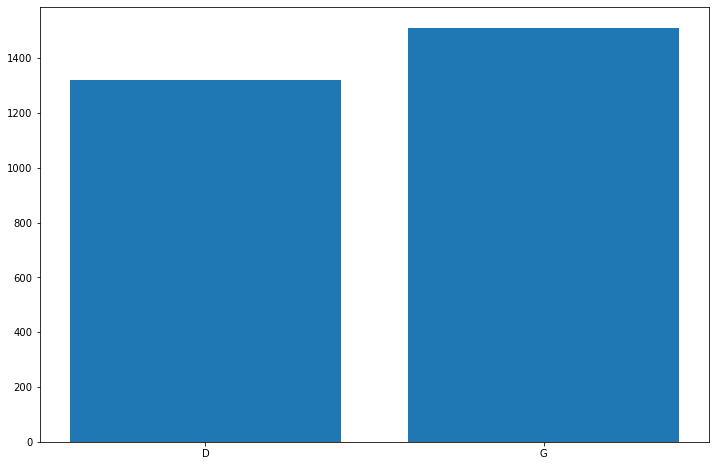

In [9]:
df_1 = invoice.groupby('Fuel Type').count().reset_index()
df_1
plt.bar(df_1['Fuel Type'], df_1['Invoice Date'])

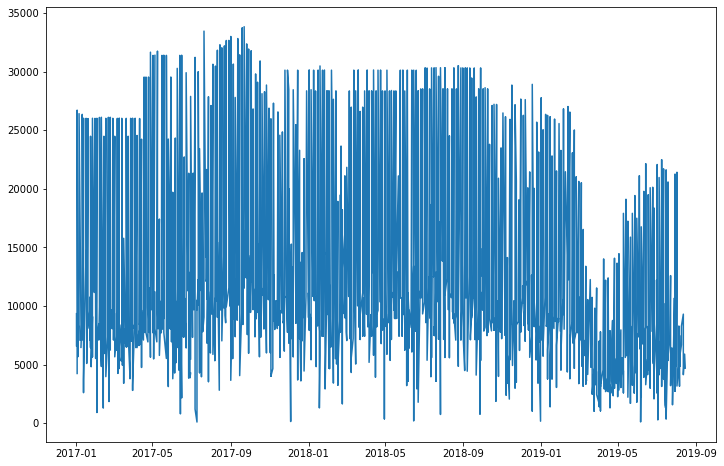

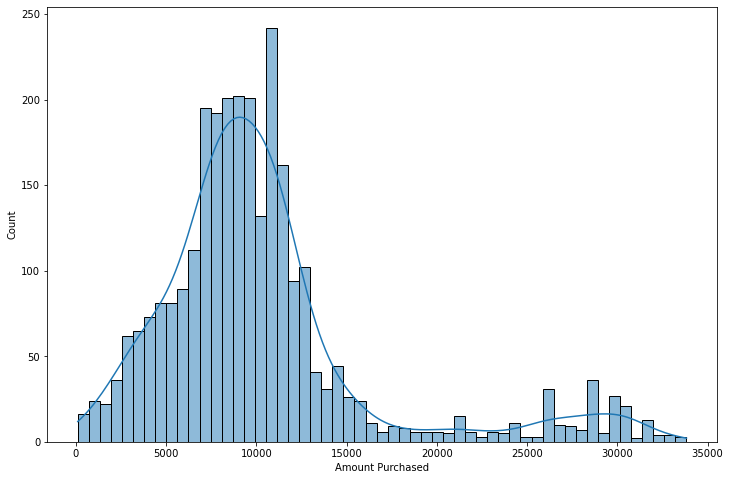

In [10]:
df_2 = invoice[invoice['Invoice Gas Station Location']==1]
plt.plot(df_2['Invoice Date'], df_2['Amount Purchased'])
plt.show()

sns.histplot(data=invoice, x='Amount Purchased', kde=True)
plt.show()

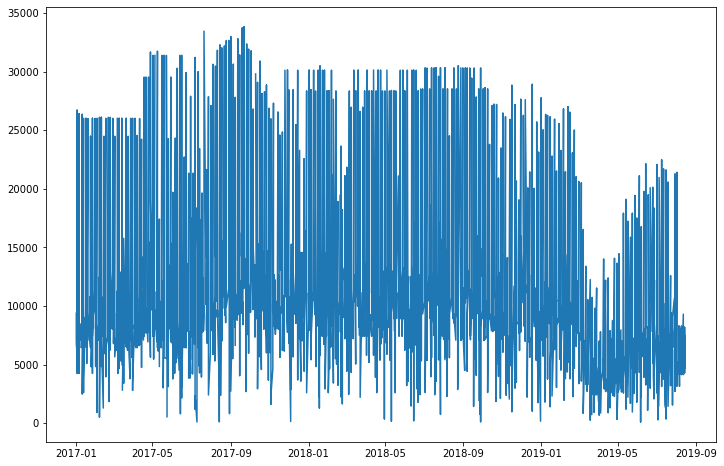

In [11]:
plt.plot(invoice['Invoice Date'], invoice['Amount Purchased'])
plt.show()

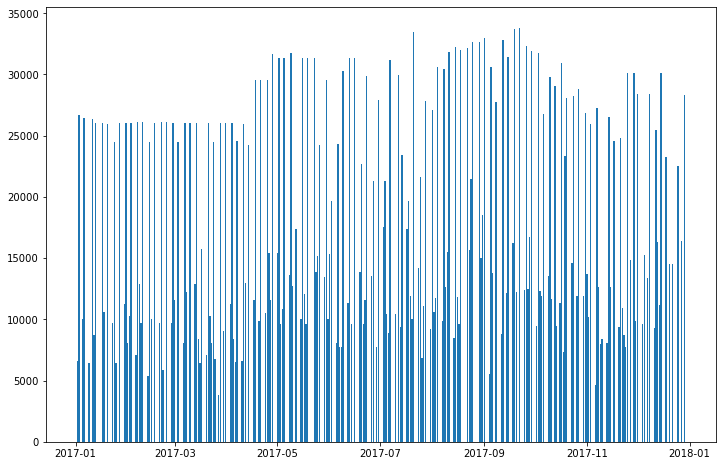

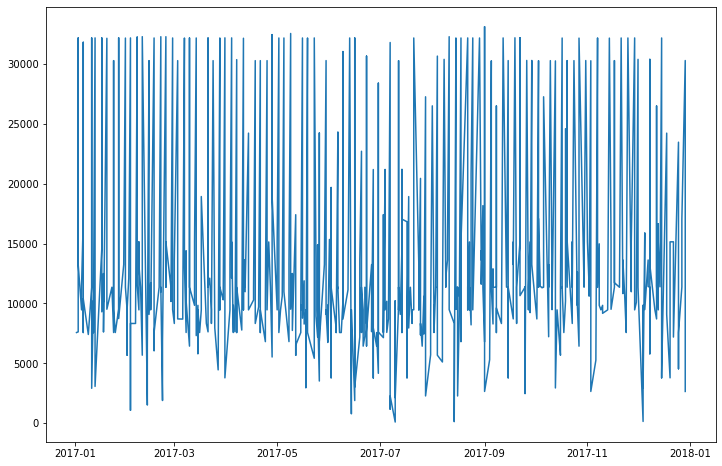

In [20]:
invoice_g_2017= invoice_g[invoice_g['Invoice Date']<'12/31/2017']

plt.bar(invoice_g_2017['Invoice Date'], invoice_g_2017['Amount Purchased'])
plt.show()
plt.plot(invoice_g_2017['Invoice Date'], invoice_g_2017['Gross Purchase Cost'])
plt.show()

In [13]:
invoice_g

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,dollar/gallon
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,1.145428
9,2017-01-03,10007.0,1,7627.60115,6659.184,G,1.145426
10,2017-01-03,10008.0,1,32175.98500,26704.960,G,1.204869
11,2017-01-03,10009.0,2,9467.31041,8265.312,G,1.145427
12,2017-01-03,10010.0,2,9463.52500,8262.000,G,1.145428
...,...,...,...,...,...,...,...
2860,2019-08-09,12819.0,4,9463.52500,6679.600,G,1.416780
2863,2019-08-09,12821.0,5,11477.36312,8101.024,G,1.416779
2866,2019-08-12,12824.0,1,5772.75025,4135.568,G,1.395878
2867,2019-08-14,12825.0,1,8074.27953,5891.168,G,1.370574


   Invoice Gas Station Location    Invoice ID  Gross Purchase Cost  \
0                             1  10556.910891         15987.085713   
1                             2  10563.800000         10773.970852   
2                             3  10543.400000         12284.412532   
3                             4  10567.573770         10225.509416   
4                             5  10542.833333          8990.004622   
5                             6  10512.428571         13218.110947   
6                             7  10721.583333          2663.982287   
7                             8  10613.200000         16661.860656   

   Amount Purchased  dollar/gallon  
0      15048.964964       1.056533  
1      10368.338267       1.043579  
2      11863.736000       1.049037  
3       9911.976393       1.040395  
4       8692.108848       1.042067  
5      12728.969143       1.055003  
6       2651.961333       1.005995  
7      15879.382400       1.050102  


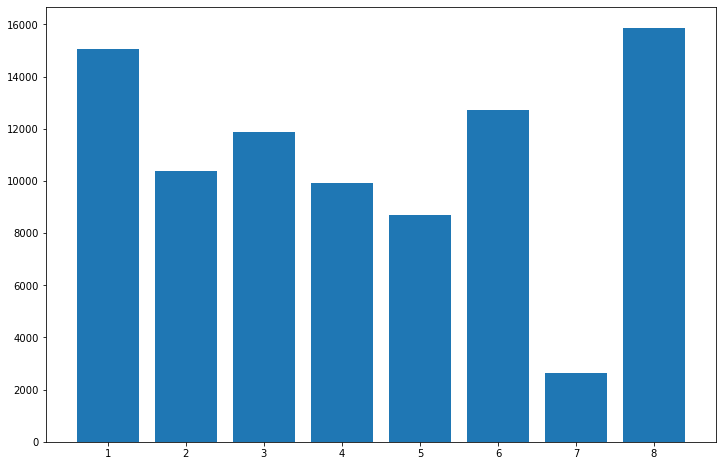

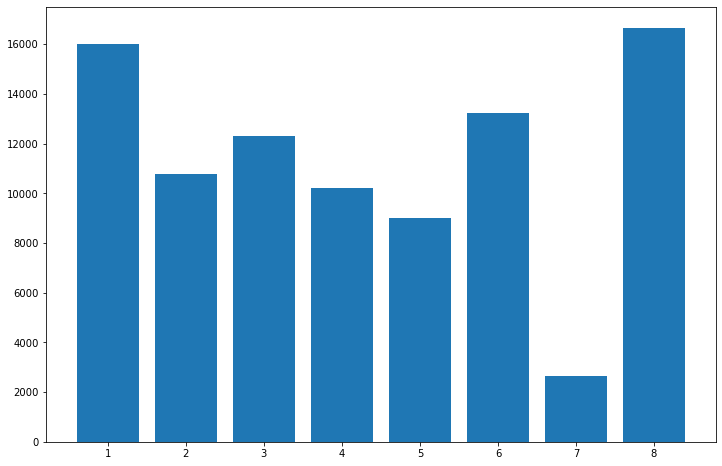

In [14]:
df_5 = invoice_g_2017.groupby('Invoice Gas Station Location').mean().reset_index()
print(df_5)
#here were looiking at how much gas each gas station has purchased per invoice
plt.bar(df_5['Invoice Gas Station Location'], df_5['Amount Purchased'])
plt.show()
#here were looiking at how much gas each gas station has spent per invoice
plt.bar(df_5['Invoice Gas Station Location'], df_5['Gross Purchase Cost'])
plt.show()

<BarContainer object of 8 artists>

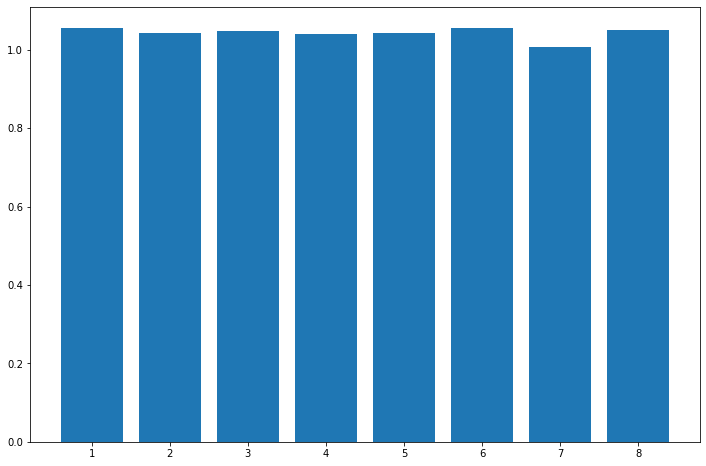

In [15]:
#here were looiking at how the average purchase price of gas for each station
plt.bar(df_5['Invoice Gas Station Location'], df_5['dollar/gallon'])

     Invoice Date  Invoice ID  Invoice Gas Station Location  \
0      2017-01-02     10000.0                             1   
9      2017-01-03     10007.0                             1   
10     2017-01-03     10008.0                             1   
18     2017-01-05     10016.0                             1   
24     2017-01-06     10021.0                             1   
...           ...         ...                           ...   
2846   2019-08-05     12805.0                             1   
2853   2019-08-07     12812.0                             1   
2858   2019-08-09     12817.0                             1   
2866   2019-08-12     12824.0                             1   
2867   2019-08-14     12825.0                             1   

      Gross Purchase Cost  Amount Purchased Fuel Type  dollar/gallon  
0              7570.82000          6609.600         G       1.145428  
9              7627.60115          6659.184         G       1.145426  
10            32175.98500     

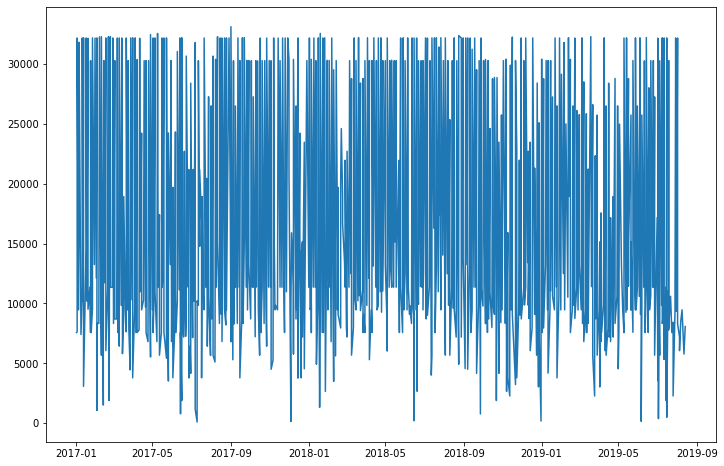

In [16]:
df_8 = invoice_g[invoice_g['Invoice Gas Station Location']==1]
print(df_8)
plt.plot(df_8['Invoice Date'], df_8['Gross Purchase Cost'])
plt.show()

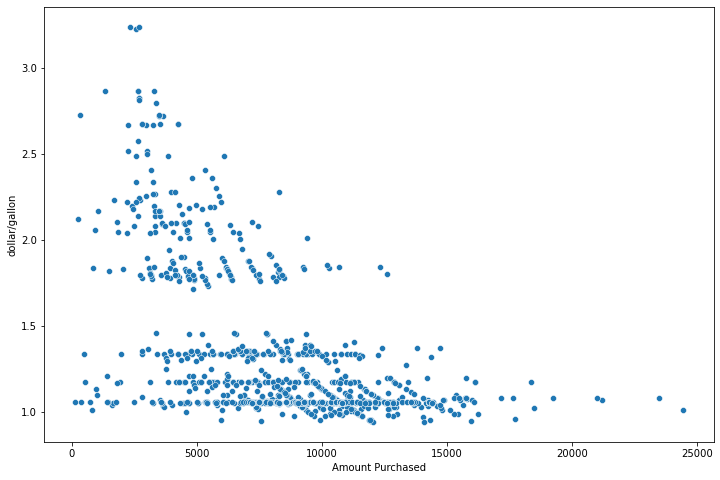

<AxesSubplot:xlabel='Amount Purchased', ylabel='dollar/gallon'>

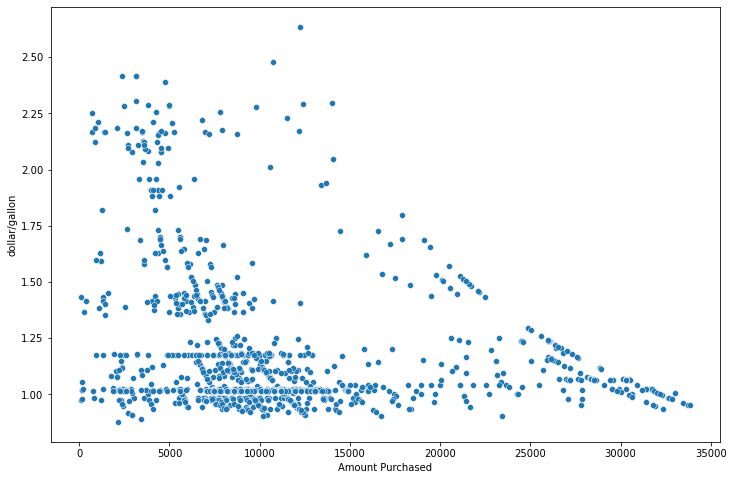

In [17]:
#lets look at the reationship between amount of fuel purchased and price per gallon for deisel and regular fuel 
sns.scatterplot(data=invoice_d, x='Amount Purchased', y='dollar/gallon')
plt.show()

sns.scatterplot(data=invoice_g, x='Amount Purchased', y='dollar/gallon')

#### There seems to be a negative correlation between amount purchased and price/gallon. as larger amounts of gas are purchased per invoice, 

<AxesSubplot:>

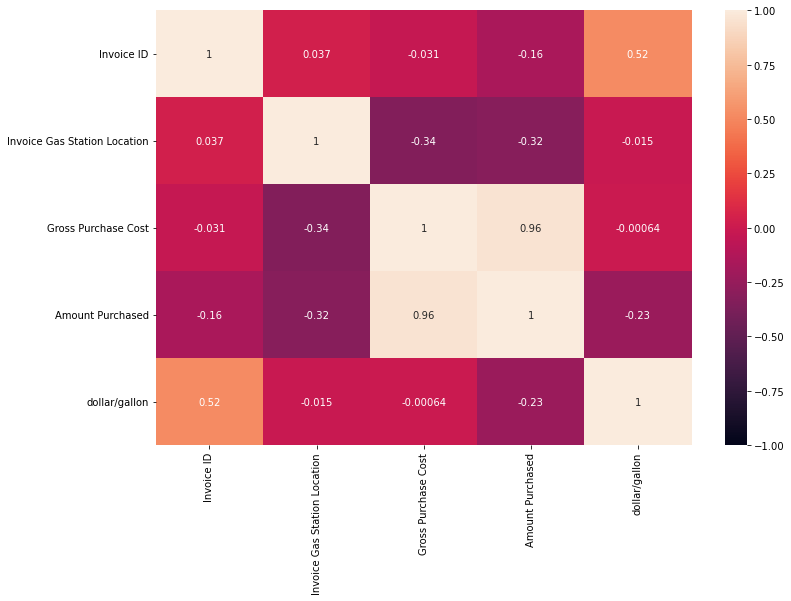

In [29]:
sns.heatmap(invoice_g.corr(), vmin=-1, vmax=1, annot=True)

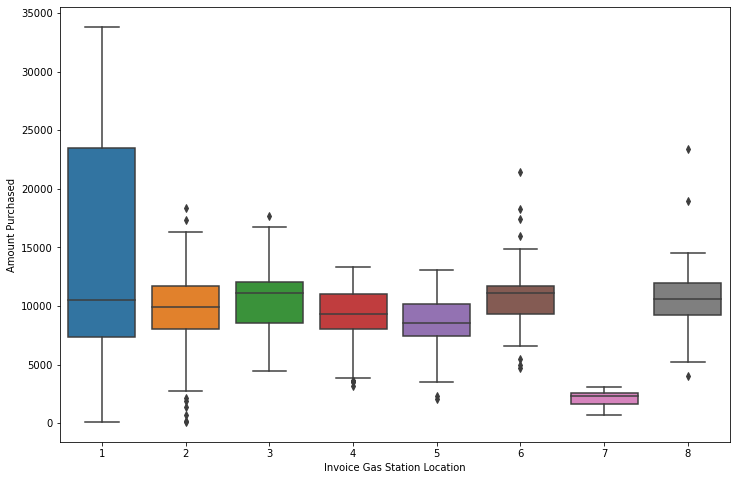

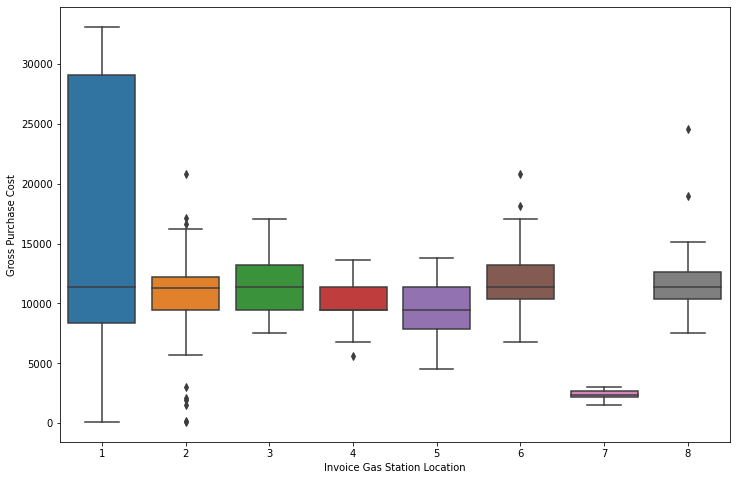

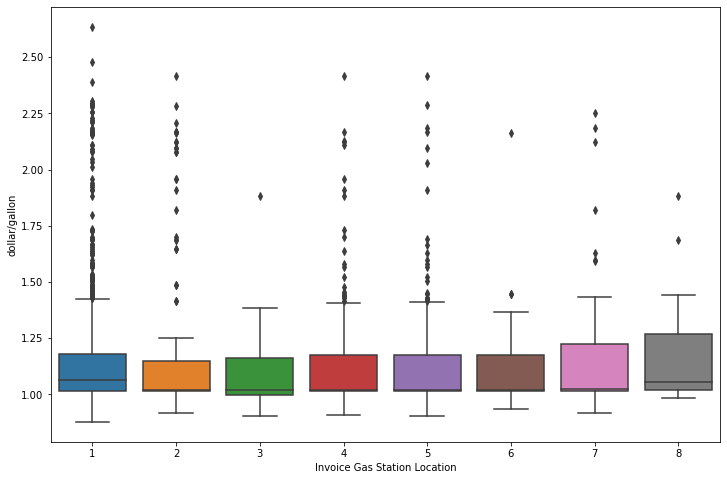

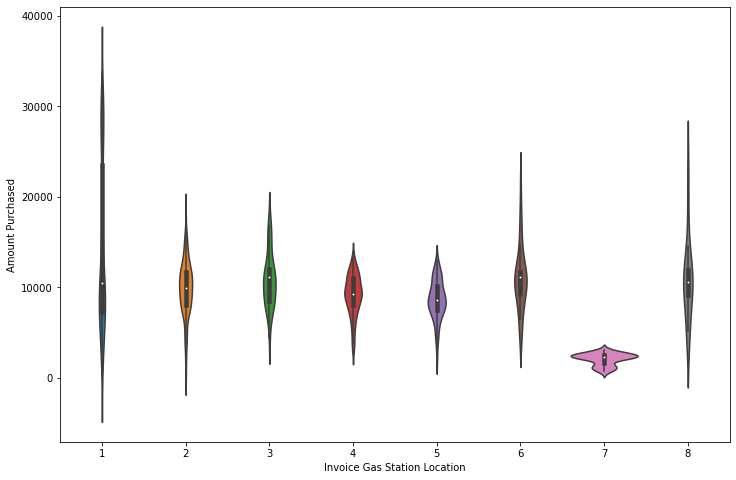

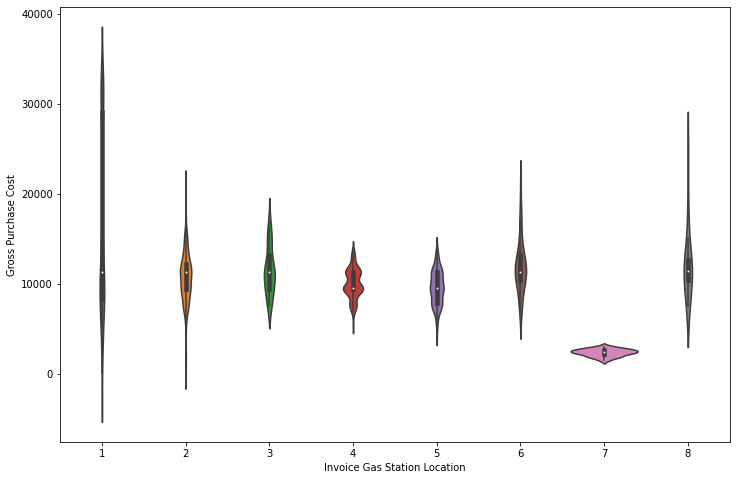

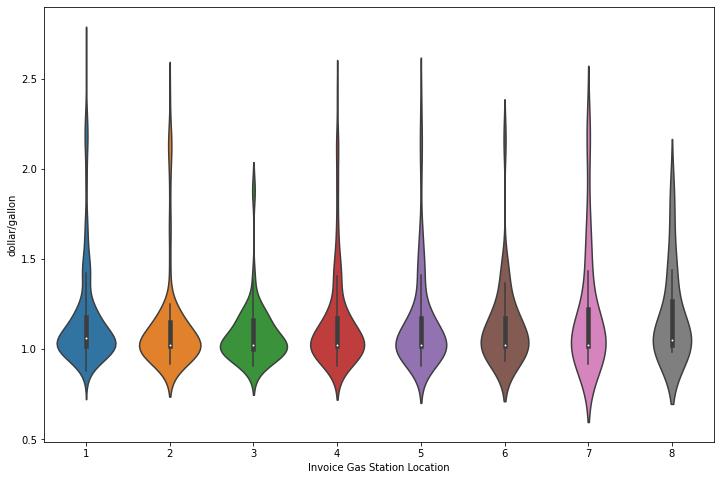

In [30]:
sns.boxplot(data=invoice_g, x='Invoice Gas Station Location', y='Amount Purchased')
plt.show()
sns.boxplot(data=invoice_g, x='Invoice Gas Station Location', y='Gross Purchase Cost')
plt.show()
sns.boxplot(data=invoice_g, x='Invoice Gas Station Location', y='dollar/gallon')
plt.show()
sns.violinplot(data=invoice_g, x='Invoice Gas Station Location', y='Amount Purchased')
plt.show()
sns.violinplot(data=invoice_g, x='Invoice Gas Station Location', y='Gross Purchase Cost')
plt.show()
sns.violinplot(data=invoice_g, x='Invoice Gas Station Location', y='dollar/gallon')
plt.show()

## Look at the relationship between tank type and price be merging the invoice dataset with the gas station latitude dataset above.  use a boxplot with tanktype on the x and price or amount purchased on the y

In [50]:
#here i will merge the two dataframes below to look at the relationship between 
print(tank_loc)
print(invoice_g.head())
invoice_g_loc = pd.merge(invoice_g, tank_loc, left_on='Invoice Gas Station Location', right_on='Tank Location', how='right')

   Tank ID  Tank Location  Tank Number Tank Type  Tank Capacity  \
0     T 10              1            1         U          40000   
1     T 11              1            2         U          40000   
2     T 12              1            3         D          40000   
3     T 13              1            4         P          40000   
4     T 14              1            5         U          40000   
5     T 15              1            6         D          40000   
6     T 16              2            1         U          70000   
7     T 17              2            2         D          40000   
8     T 18              2            3         U          40000   
9     T 19              2            4         D          70000   
10    T 20              3            1         U          30000   
11    T 21              3            2         D          30000   
12    T 22              4            1         U          40000   
13    T 23              4            2         D          4000

In [51]:
invoice_g_loc.head()

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,dollar/gallon,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,1.145428,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651
1,2017-01-03,10007.0,1,7627.60115,6659.184,G,1.145426,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651
2,2017-01-03,10008.0,1,32175.98500,26704.960,G,1.204869,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651
3,2017-01-05,10016.0,1,9463.52500,8262.000,G,1.145428,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651
4,2017-01-06,10021.0,1,17041.91582,14568.480,G,1.169780,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651


/Users/anatolecolevas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tank Type', ylabel='dollar/gallon'>

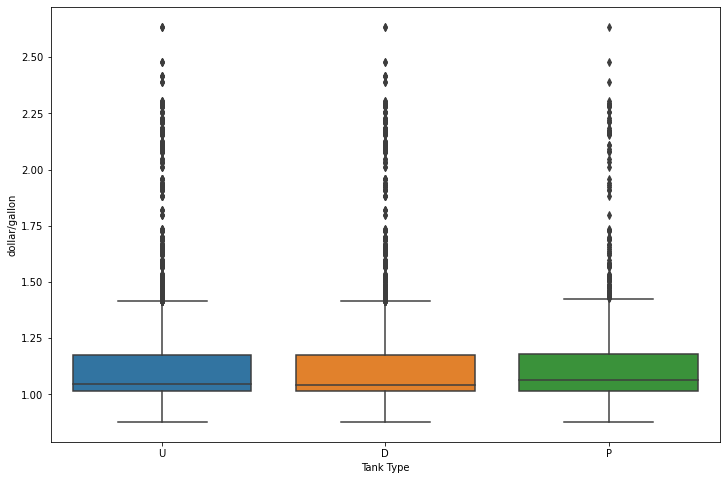

In [52]:
sns.boxplot(invoice_g_loc['Tank Type'], invoice_g_loc['dollar/gallon'])

/Users/anatolecolevas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tank ID', ylabel='dollar/gallon'>

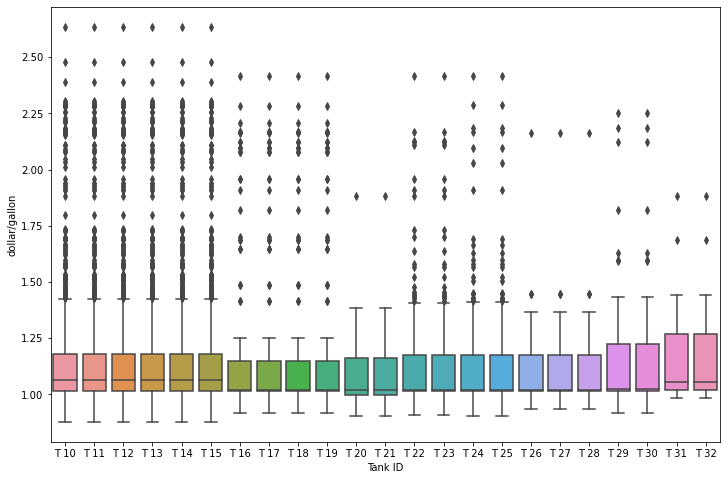

In [53]:
sns.boxplot(invoice_g_loc['Tank ID'], invoice_g_loc['dollar/gallon'])

### INvestigate time series in greater detail. look if prices spike during certain tymes of the year or month or even day.
- also look more into fuel level and determine  how that changes in each tank throughout the day/ month.